In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

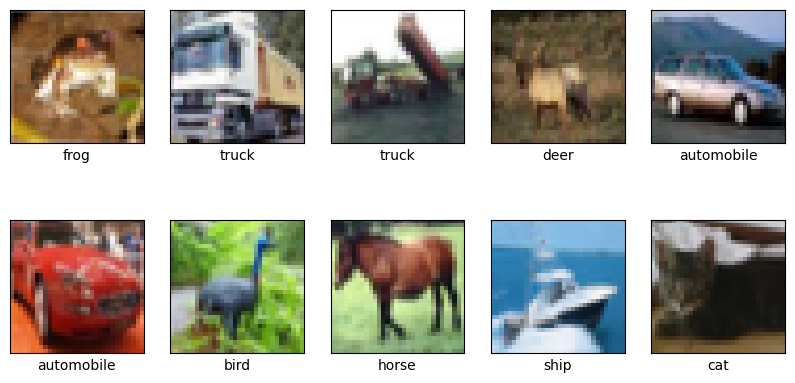

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i].argmax()])
plt.show()

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 99ms/step - accuracy: 0.3233 - loss: 0.0778 - val_accuracy: 0.5263 - val_loss: 0.0606
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 98ms/step - accuracy: 0.5518 - loss: 0.0582 - val_accuracy: 0.5896 - val_loss: 0.0535
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 94ms/step - accuracy: 0.6135 - loss: 0.0513 - val_accuracy: 0.6337 - val_loss: 0.0487
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 99ms/step - accuracy: 0.6572 - loss: 0.0463 - val_accuracy: 0.6242 - val_loss: 0.0501
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 94ms/step - accuracy: 0.6835 - loss: 0.0431 - val_accuracy: 0.6685 - val_loss: 0.0450
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 102ms/step - accuracy: 0.7124 - loss: 0.0396 - val_accuracy: 0.6976 - val_loss: 0.0413
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 94ms/step - accuracy: 0.7327 - loss: 0.0373 - val_accuracy: 0.6950 - val_loss: 0.0418
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.7494 - loss: 0.0352 -

Text(0.5, 1.0, 'Training and Validation Accuracy')

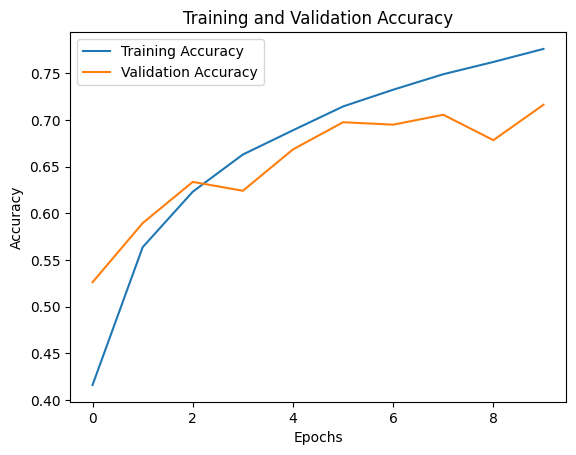

In [ ]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

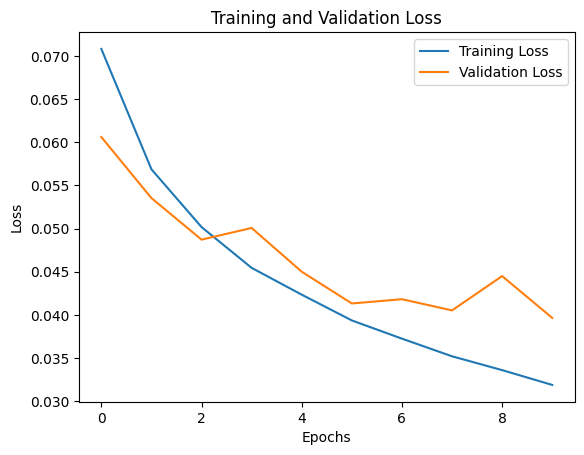

In [ ]:
# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.2f}")

313/313 - 1s - 3ms/step - accuracy: 0.7036 - loss: 0.0410

Test accuracy: 0.70


In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Figure size 1000x800 with 0 Axes>

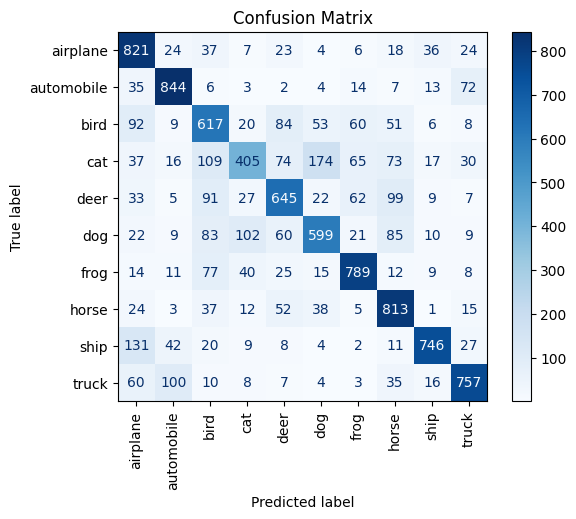

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical', values_format='d')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
random_index = np.random.randint(0, len(x_test))
random_test_image = x_test[random_index]
random_test_label = y_test[random_index]
actual_label_name = class_names[np.argmax(random_test_label)]

In [ ]:
classification_predictions_single = model.predict(np.array([random_test_image]))
predicted_label = np.argmax(classification_predictions_single, axis=1)[0]  # Extract the single label
predicted_label_name = class_names[predicted_label]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


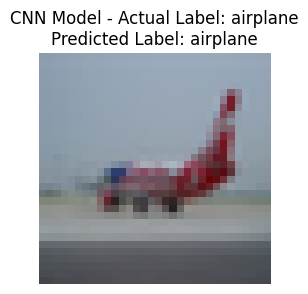

In [ ]:
plt.figure(figsize=(6, 3))
plt.imshow(random_test_image)
plt.title(f'CNN Model - Actual Label: {actual_label_name}\nPredicted Label: {predicted_label_name}')
plt.axis('off')
plt.show()